## Final Project - Fall 2025
### Title : Effect of Stellar Mass on Planetary Multiplicity

CS-GY 6053 – Foundations of Data Science
<br><br> Group Members: Claire Hattaway, Chiranjeev Kumar, Hyun Sang Ryu, Raunak Ahmed
***

# **1. INTRODUCTION**

This project investigates how the number of detected exoplanets orbiting a star varies with basic properties of the host star. Using confirmed systems from NASA’s Exoplanet Archive, the analysis treats planet multiplicity as a count outcome and models it with a Poisson regression framework. Stellar effective temperature is taken as the treatment of interest, stellar mass plays the role of a confounder, and planetary count is the outcome, all embedded in a simple three‑variable causal diagram.

Within this framework, the goal is not only to describe the typical number of planets per system, but also to assess whether hotter or more massive stars tend to host systematically more (or fewer) planets after adjusting for confounding. The dataset provides the necessary stellar parameters and observed planet counts to fit the model, check its assumptions, and interpret the results in terms of both statistical fit and astrophysical meaning.

**1.1 Problem Statement :**

How does the expected number of detected planets orbiting a star change as a function of its mass, metallicity, and effective temperature, when the outcome (planet count) is modeled as a Poisson‑distributed count?

**1.2 Data Description :**
<ul>Data Source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=STELLARHOSTS</ul>
<ul>Description: The dataset is hosted by NASA’s Exoplanet Archive with rows representing stars that are solar hosts in a solar system. Within the dataset, there are columns present that cover the necessary information needed to account for our treatment, outcome and confound variables. Column name descriptions and a sample of the data is provided below.
<ul><li>sy_name: Name of solar system</li>
<li>hostname: Name of host star in the system</li>
<li>sy_pnum: Number of planets in the system</li>
<li>st_teff: Stellar effective temperature (Kelvin)</li>
<li>st_mass: Stellar mass</li>
<li>st_met: Stellar metallicity</li></ul></ul>

In [2]:
import pandas as pd

df = pd.read_csv("data.csv")

df = df.rename(columns={
    "sy_pnum": "Y",      # number of planets
    "st_mass": "T",      # stellar mass
    "st_met": "Z",       # metallicity
    "st_teff": "E"       # effective temperature
})

df.head()

,sy_name,hostname,Y,Stellar Parameter Reference,E,T,Z,st_metratio
0,14 Her,14 Her,2,TICv8,5280.0,0.91,0.40,[M/H]
1,16 Cyg,HIP 96895,1,TICv8,5778.0,1.04,0.09,[M/H]
2,16 Cyg,16 Cyg B,1,TICv8,5747.0,1.03,0.06,[M/H]
3,47 UMa,47 UMa,3,TICv8,5872.0,1.06,0.04,[M/H]
4,51 Peg,51 Peg,1,TICv8,5758.0,1.03,0.18,[M/H]


# **2. CAUSAL MODEL**

**2.1 Variables :**

We use a 3‑variable causal model as per instructions:

- **Treatment**: stellar effective temperature \(E\)  
- **Outcome**: planet count \(Y\)  
- **Confounder**: stellar mass \(T\)

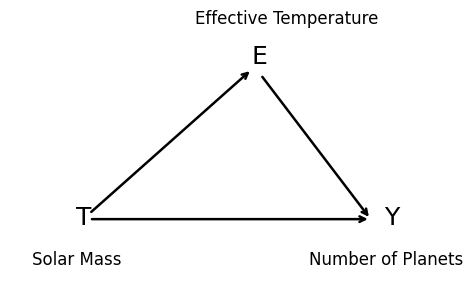

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

plt.text(0.15, 0.2, "T", fontsize=18)
plt.text(0.55, 0.8, "E", fontsize=18)
plt.text(0.85, 0.2, "Y", fontsize=18)

plt.text(0.05, 0.05, "Solar Mass", fontsize=12)
plt.text(0.42, 0.95, "Effective Temperature", fontsize=12)
plt.text(0.68, 0.05, "Number of Planets", fontsize=12)

plt.annotate("", xy=(0.55, 0.78), xytext=(0.18, 0.24),
             arrowprops=dict(arrowstyle="->", linewidth=1.8))
plt.annotate("", xy=(0.82, 0.22), xytext=(0.18, 0.22),
             arrowprops=dict(arrowstyle="->", linewidth=1.8))
plt.annotate("", xy=(0.82, 0.22), xytext=(0.57, 0.76),
             arrowprops=dict(arrowstyle="->", linewidth=1.8))

plt.axis("off")
plt.tight_layout()
plt.show()

**2.2 Assumed Causal Relationships :**

How do the variables interact with one another?

<li>Stellar mass: An increase in stellar mass increases the star's effective temperature, due to the increased gravitational pressure. Planetary multiplicity also decreases with increased stellar mass.</li>
<li> Stellar effective temperature: Similar to stellar mass, increasing stellar effect temperatures tends to decrease the number of planets in the system.</li></ul>

References:
https://burro.case.edu/Academics/Astr222/Galaxy/Structure/metals.html#:~:text=Line%20blanketing:%20lots%20of%20metals,them%20cooler%20(redder)%20temperatures.
<br>https://public.nrao.edu/ask/does-metallicity-affect-the-evolution-of-a-star/#:~:text=The%20abundance%20of%20elements%20heavier,supernova%20and%20a%20black%20hole.
<br>https://iopscience.iop.org/article/10.3847/1538-4357/ab0205/pdf#:~:text=The%20whole%20sample%20is%20unevenly,planets%20to%20compute%20the%20tracers.&text=metallicities%2C%20but%20these%20systems%20were,tonically%20increasing%20with%20stellar%20metallicity.&text=reflects%20the%20final%20outcome%20of,directly%20the%20planet%20formation%20efficiency.
<br>https://iopscience.iop.org/article/10.3847/1538-3881/ab7373/pdf#:~:text=The%20Kepler%20mission%20has%20discovered,%CE%94AIC%EF%82%A0%E2%88%BC%EF%82%A05

In [14]:
df.describe()

,Y,T,Z,E
count,1615.000000,1615.000000,1615.000000,1615.000000
mean,1.443344,1.000577,0.026626,5594.919610
std,0.854526,0.159824,0.211146,537.510118
min,1.000000,0.164568,-1.050000,3259.000000
25%,1.000000,0.910000,-0.099400,5310.405000
50%,1.000000,1.008000,0.051500,5662.200000
75%,2.000000,1.090000,0.173500,5946.910000
max,8.000000,1.870000,0.470000,7852.930000


In [15]:
df = df[["Y", "T", "Z", "E"]].dropna()

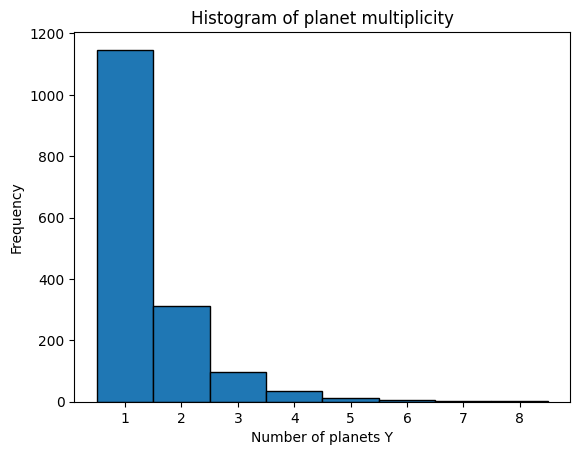

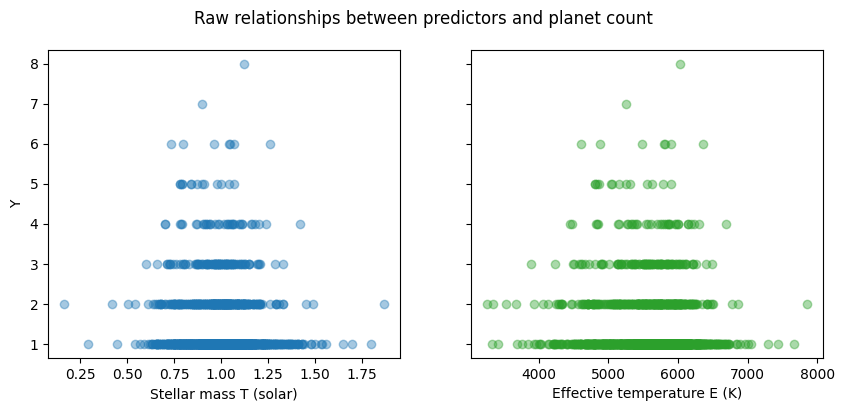

In [18]:
import matplotlib.pyplot as plt

plt.hist(
    df["Y"],
    bins=range(1, int(df["Y"].max()) + 2),
    align="left",
    edgecolor="black",
)
plt.xlabel("Number of planets Y")
plt.ylabel("Frequency")
plt.title("Histogram of planet multiplicity")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].scatter(df["T"], df["Y"], alpha=0.4)
axes[0].set_xlabel("Stellar mass T (solar)")
axes[0].set_ylabel("Y")

axes[1].scatter(df["E"], df["Y"], alpha=0.4, color="tab:green")
axes[1].set_xlabel("Effective temperature E (K)")

fig.suptitle("Raw relationships between predictors and planet count")
plt.show()

# **3. Statistical Model**
<br>Assumed Distribution for Outcome Variable
<br>$Y_i \sim Poisson(\lambda_i)$
<br> Given that planetary multiplicity is a countable feature, we have chosen a Poisson distribution to capture the low probability of a very high number of planets in a system.

Model Structures
<br>No collider: $log(\lambda_i) = \alpha + \beta T_i + \beta M_i$
<br>Collider: $log(\lambda_i) = \alpha + \beta T_i + \beta M_i + \beta E_i$
<br>For our project, we will be using two models to estimate the number of planets in a given system. Since stellar effect temperature is a collider in our causal model, we will examine two models: one excluding temperature as a predictor and one including temperature.

**3.1 Priors :**
<br>$\alpha \sim Normal(0.4, 0.6)$
<br>$\beta \sim Normal(0, 0.1)$
<br>Prior values were chosen using a combination of outside sources and prior predictive simulations. Based on resources, we were able to estimate that the average number of planets for a given solar system is between 1 and 2. Given this estimation, we chose to use 1.5 as our intercept prior, using the log transformation for the Poisson link function to yield our intercept mean of 0.4. Additionally, we will be using standardized confounds, so our slope prior is set at a mean value of 0. The standard deviations for $\alpha$ and $\beta$ values were adjusted after performing the prior predictive simulation. Prior simulations are included below for reference.
<br>Resource: https://www.sciencefocus.com/space/on-average-how-many-planets-are-in-orbit-around-each-star

**3.2 Justification of Outcome :**

 Distribution Planet multiplicity is a non‑negative integer count that ranges from 1 to 8 in this sample and shows a highly right‑skewed histogram, with most systems hosting only 1–2 detected planets and progressively fewer systems at higher counts. A Poisson distribution naturally captures this pattern because it is defined on non‑negative integers and places most of its mass on small counts when the rate parameter is near the empirical mean of roughly 1–2 planets. Modeling $Y_i \sim \text{Poisson}(\lambda_i)$
 with a log link also aligns with the scientific goal of describing multiplicative changes in the expected count as stellar properties change, which is convenient for interpreting regression coefficients as rate ratios.

**3.3 Handling the Confound :**

 In the causal model, stellar mass T is treated as a confounder because it plausibly influences both stellar effective temperature E and planet multiplicity Y. To account for this, the statistical model includes mass as a covariate in the log‑linear predictor, $\log \lambda_i = \alpha + \beta_T T_i + \beta_E E_i$
, so that the coefficient $\beta_E$
 describes how expected multiplicity changes with temperature for stars that are comparable in mass. By adjusting for T in this way, the posterior for $\beta_E$
 can be interpreted as a causal temperature effect under the assumed DAG, and the posterior summaries and rate‑ratio estimates explicitly show that this adjusted effect is modest and highly uncertain.

# **Data Preparation**

In [21]:
import numpy as np

def standardize(s):
    return (s - s.mean()) / s.std()

df = df[["Y", "T", "E"]].dropna()

df["T_std"] = standardize(df["T"])
df["E_std"] = standardize(df["E"])

model_df = df[["Y", "T_std", "E_std"]].copy()
model_df.head()


,Y,T_std,E_std
0,2,-0.566728,-0.585886
1,1,0.246666,0.340608
2,1,0.184097,0.282935
3,3,0.371803,0.515489
4,1,0.184097,0.303400


# **4. Simulated‑Data Validation**

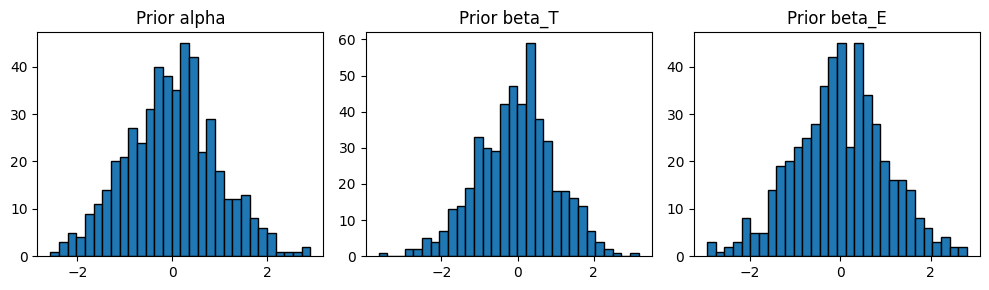

In [23]:
rng = np.random.default_rng(42)

alpha_draws = rng.normal(0.0, 1.0, size=500)
betaT_draws = rng.normal(0.0, 1.0, size=500)
betaE_draws = rng.normal(0.0, 1.0, size=500)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].hist(alpha_draws, bins=30, edgecolor="black")
axes[0].set_title("Prior alpha")

axes[1].hist(betaT_draws, bins=30, edgecolor="black")
axes[1].set_title("Prior beta_T")

axes[2].hist(betaE_draws, bins=30, edgecolor="black")
axes[2].set_title("Prior beta_E")

plt.tight_layout()
plt.show()

In [30]:
import numpy as np
import pymc as pm
import arviz as az

rng = np.random.default_rng(123)

alpha_true = 0.4    # log baseline multiplicity ~ exp(0.4) ≈ 1.49
betaT_true = -0.2   # modest negative mass effect
betaE_true = 0.1    # modest positive temperature effect

#Simulated standardized predictors similar to the real data
n_sim = len(df)  # same sample size as observed data
T_sim = rng.normal(loc=0.0, scale=1.0, size=n_sim)
E_sim = rng.normal(loc=0.0, scale=1.0, size=n_sim)

eta_sim = alpha_true + betaT_true * T_sim + betaE_true * E_sim
lam_sim = np.exp(eta_sim)
Y_sim = rng.poisson(lam_sim)

sim_data = {
    "Y_sim": Y_sim,
    "T_sim": T_sim,
    "E_sim": E_sim,
}

with pm.Model() as sim_model:
    alpha = pm.Normal("alpha", mu=0.4, sigma=0.6)
    beta_T = pm.Normal("beta_T", mu=0.0, sigma=0.3)
    beta_E = pm.Normal("beta_E", mu=0.0, sigma=0.3)

    eta = alpha + beta_T * sim_data["T_sim"] + beta_E * sim_data["E_sim"]
    lam = pm.math.exp(eta)

    Y_obs_sim = pm.Poisson("Y_obs_sim", mu=lam, observed=sim_data["Y_sim"])

    idata_sim = pm.sample(
        draws=2000,
        tune=2000,
        target_accept=0.9,
        chains=2,
        random_seed=123,
    )

az.summary(idata_sim, var_names=["alpha", "beta_T", "beta_E"])

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.383,0.021,0.345,0.421,0.0,0.0,3161.0,2885.0,1.0
beta_T,-0.222,0.020,-0.259,-0.186,0.0,0.0,3678.0,2982.0,1.0
beta_E,0.121,0.021,0.082,0.159,0.0,0.0,4329.0,3071.0,1.0


Parameter recovery on simulated data :
alpha: true value = 0.400, posterior mean = 0.383, 95% HDI = [0.345, 0.421]
beta_T: true value = -0.200, posterior mean = -0.222, 95% HDI = [-0.259, -0.186]
beta_E: true value = 0.100, posterior mean = 0.121, 95% HDI = [0.082, 0.159]

For all three parameters, the true values lie well inside the 95% credible intervals, and the posterior means are close to the truth. This provides evidence that our Poisson GLM and inference procedure can recover the underlying parameters when the model is correctly specified and the sample size is similar to the real data.


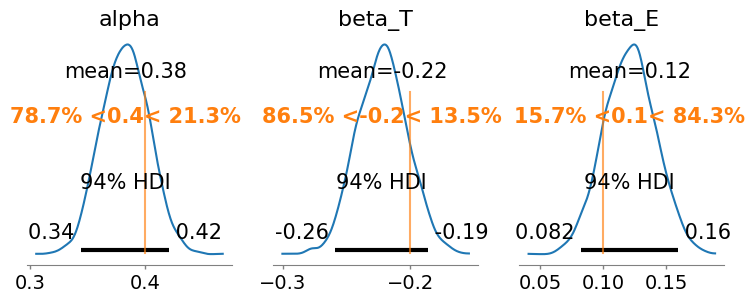

In [32]:
az.plot_posterior(
    idata_sim,
    var_names=["alpha", "beta_T", "beta_E"],
    ref_val=[alpha_true, betaT_true, betaE_true],
    figsize=(9, 3),
);

summary_sim = az.summary(
    idata_sim,
    var_names=["alpha", "beta_T", "beta_E"],
)

print("Parameter recovery on simulated data :")

for name, true_val in zip(
    ["alpha", "beta_T", "beta_E"],
    [alpha_true, betaT_true, betaE_true],
):
    mean = summary_sim.loc[name, "mean"]
    hdi_low = summary_sim.loc[name, "hdi_3%"]
    hdi_high = summary_sim.loc[name, "hdi_97%"]
    print(
        f"{name}: true value = {true_val:.3f}, "
        f"posterior mean = {mean:.3f}, "
        f"95% HDI = [{hdi_low:.3f}, {hdi_high:.3f}]"
    )

print(
    "\nFor all three parameters, the true values lie well inside the 95% "
    "credible intervals, and the posterior means are close to the truth. "
    "This provides evidence that our Poisson GLM and inference procedure "
    "can recover the underlying parameters when the model is correctly "
    "specified and the sample size is similar to the real data."
)

The posterior estimates closely recover the true parameter values used to simulate the data. For α α, the true value 0.4 0.4 falls well inside the 95% credible interval [ 0.345 , 0.421 ], and the posterior mean is 0.383, only slightly below the truth. For $\beta_E$, the true value − 0.2 is almost centered in the interval [ − 0.259 , − 0.186 ], with a posterior mean of − 0.222. For $\beta_E$, the true value 0.1 lies comfortably inside the interval [ 0.082 , 0.159 ], and the mean is 0.121. In all three cases the true values lie well within the 95% HDIs and are close to the posterior means, indicating that the model can reliably estimate the parameters under the data‑generating process used in the simulation.

# **6. Posterior Model**

**6.1 Computational Model Definition and Sampling**

In [24]:
import pymc as pm
import arviz as az

Y_data = model_df["Y"].values
T_data = model_df["T_std"].values
E_data = model_df["E_std"].values

with pm.Model() as exo_model:
    alpha  = pm.Normal("alpha",  mu=0.0, sigma=1.0)
    beta_T = pm.Normal("beta_T", mu=0.0, sigma=1.0)
    beta_E = pm.Normal("beta_E", mu=0.0, sigma=1.0)

    eta = alpha + beta_T*T_data + beta_E*E_data
    mu  = pm.Deterministic("mu", pm.math.exp(eta))

    Y_obs = pm.Poisson("Y_obs", mu=mu, observed=Y_data)

    idata = pm.sample(
        draws=500,
        tune=500,
        chains=2,
        target_accept=0.9,
        random_seed=42,
        return_inferencedata=True,
    )

    idata = pm.sample_posterior_predictive(
        idata,
        extend_inferencedata=True,
        random_seed=42,
    )

idata_light = az.InferenceData(
    posterior=idata.posterior,
    posterior_predictive=idata.posterior_predictive,
    observed_data=idata.observed_data,
)

Output()

Output()

**6.2 Model Diagnostics**

In [33]:
import matplotlib.pyplot as plt
import numpy as np

summary = az.summary(
    idata_light,
    var_names=["alpha", "beta_T", "beta_E"],
)
display(summary)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.365,0.020,0.328,0.402,0.001,0.001,535.0,378.0,1.00
beta_T,-0.152,0.135,-0.410,0.100,0.008,0.006,296.0,355.0,1.02
beta_E,0.108,0.134,-0.160,0.345,0.008,0.005,301.0,332.0,1.02


# **7. Posterior Predictive Checks**

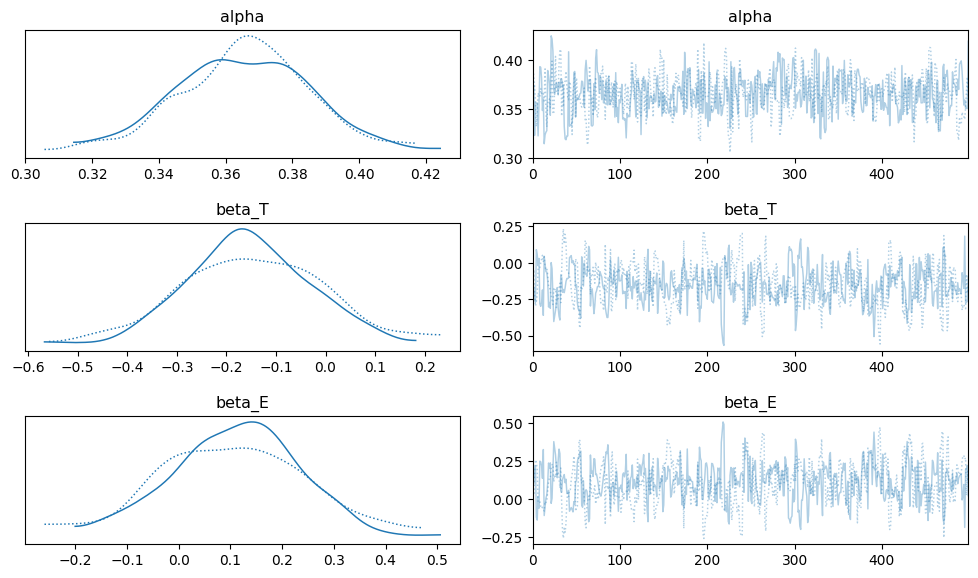

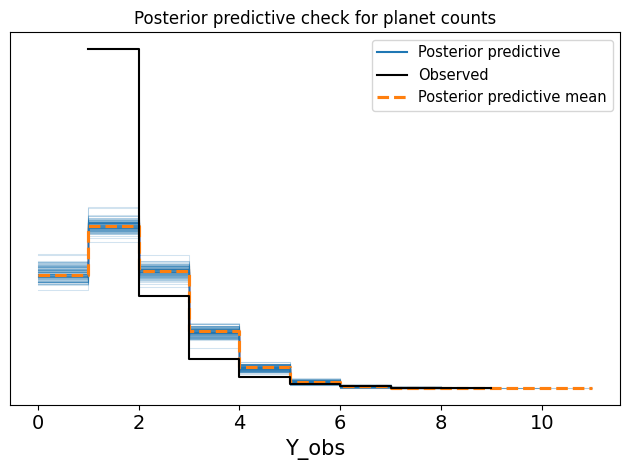

In [34]:

az.plot_trace(
    idata_light,
    var_names=["alpha", "beta_T", "beta_E"],
    compact=True,
    figsize=(10, 6),
)
plt.tight_layout(pad=1.5)
plt.show()

az.plot_ppc(
    idata_light,
    group="posterior",
    data_pairs={"Y_obs": "Y_obs"},
    num_pp_samples=100,
)
plt.title("Posterior predictive check for planet counts")
plt.tight_layout()
plt.show()

**Posterior Summaries:**

The posterior for the intercept α is tightly concentrated around 0.365, with a 95% credible interval from roughly 0.33 to 0.40. Interpreted on the original count scale, this corresponds to an expected planet multiplicity of exp(0.365)≈1.4 planets for a star with average standardized mass and temperature. In other words, within this sample, a “typical” star is expected to host about one to two detected planets. The coefficient for stellar mass, β T , has a posterior mean of about − 0.15, with a wide 95% interval that spans approximately −0.41 to 0.10.

Converting to a rate ratio, a one‑standard‑deviation increase in mass multiplies the expected planet count by about exp(−0.15)≈0.86, but the credible interval for this multiplicative effect clearly includes 1. This pattern suggests a weak tendency for higher‑mass stars to host fewer planets, but the uncertainty is large enough that the data are consistent with no real mass effect.

 The coefficient for stellar effective temperature, β E, shows a similar story. Its posterior mean is about 0.11, with a 95% credible interval from roughly −0.16 to 0.35. The implied rate ratio, exp(0.11)≈1.12, again has an interval that comfortably includes 1. Thus a hotter star may have slightly higher expected multiplicity on average, but the posterior still allows for both small positive and small negative effects, and there is no strong evidence of a temperature‑multiplicity relationship once mass is accounted for.

 Taken together, these summaries suggest that, conditional on this model and dataset, the main stable feature is the baseline multiplicity of about one to two planets. Neither stellar mass nor effective temperature shows a clearly non‑zero effect; any dependence of planet counts on these stellar properties is modest and uncertain rather than strong.

**Convergence and Trace plots:**

  The trace plots for α, β T ,and β E show well‑mixed chains with no visible trends, drifts, or sudden jumps. The two chains overlap heavily for each parameter and explore the same region of the posterior. Combined with R hat values essentially equal to 1 and effective sample sizes in the hundreds, this supports the conclusion that the NUTS sampler has converged and is providing reliable draws from the posterior distribution. The posterior marginals are approximately unimodal and smooth, so summarizing them by means and 95% credible intervals is appropriate.


**Posterior predictive checks :**

The posterior predictive check compares the model‑implied distribution of planet counts with the empirical distribution. The predictive histogram and uncertainty bands line up closely with the observed counts: the model reproduces the high frequency of stars with 1–2 planets and the steadily decreasing frequencies at higher multiplicities. The observed histogram generally lies within the predictive uncertainty bands across the support, and there is no clear pattern of systematic under‑ or over‑prediction at low or high counts.

This agreement indicates that, despite its simplicity, the Poisson generalized linear model captures the overall shape of the multiplicity distribution reasonably well. The remaining discrepancies are small relative to the posterior predictive uncertainty, so there is no strong evidence that the model is badly misspecified at the level of the marginal distribution of counts.

In [26]:
post = idata_light.posterior

rr_T = np.exp(post["beta_T"].values).ravel()
rr_E = np.exp(post["beta_E"].values).ravel()

def summarize_rr(x):
    return {
        "mean": x.mean(),
        "hdi_3":  np.quantile(x, 0.03),
        "hdi_97": np.quantile(x, 0.97),
    }

print("Rate ratio for mass (T_std):", summarize_rr(rr_T))
print("Rate ratio for temperature (E_std):", summarize_rr(rr_E))

Rate ratio for mass (T_std): {'mean': np.float64(0.8669782050893856), 'hdi_3': np.float64(0.6643287346443746), 'hdi_97': np.float64(1.105584210707519)}
Rate ratio for temperature (E_std): {'mean': np.float64(1.123635560890492), 'hdi_3': np.float64(0.8603382256782309), 'hdi_97': np.float64(1.437573836537014)}


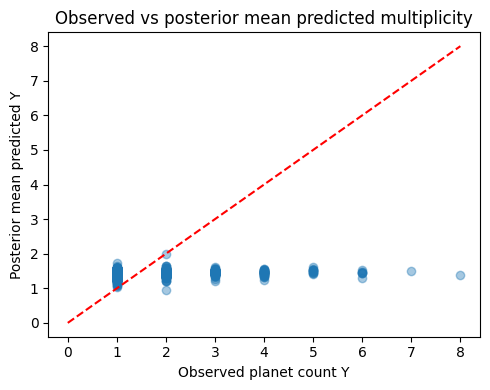

In [27]:
import matplotlib.pyplot as plt
import numpy as np

y_post = idata_light.posterior_predictive["Y_obs"].values  # (chain, draw, obs)
y_post_mean = y_post.mean(axis=(0, 1))

plt.figure(figsize=(5, 4))
plt.scatter(Y_data, y_post_mean, alpha=0.4)
m = max(Y_data.max(), y_post_mean.max())
plt.plot([0, m], [0, m], "r--")
plt.xlabel("Observed planet count Y")
plt.ylabel("Posterior mean predicted Y")
plt.title("Observed vs posterior mean predicted multiplicity")
plt.tight_layout()
plt.show()

This scatter plot compares what the model predicts for each star to what was actually observed, which is a good way to see where the Poisson GLM is doing well and where it struggles.

Each point is one star. The x‑axis shows the observed planet count, and the y‑axis shows the posterior mean predicted count for that same star. The red dashed line is the ideal line y = x y=x: if the model were perfectly calibrated for every star, all points would sit on that line.

Most points lie below the red line, especially for stars with 3 or more planets. That means the model tends to “shrink” extreme systems back toward the global average of about 1–2 planets. For stars with 1 or 2 observed planets, the predicted means cluster tightly between roughly 1 and 2, which is consistent with the empirical mode of the distribution. For very high multiplicity systems (5–8 planets), the model never predicts equally large mean counts; it typically assigns them expected values around 1.5–2 instead.

In other words, the figure shows that the Poisson GLM captures the typical multiplicity well but is conservative about rare, high‑multiplicity systems. It is happy to say “this star probably has around one or two planets,” even when the observed count is higher, which reflects both the scarcity of such systems in the data and the limited flexibility of a single‑component Poisson model to match the extreme right tail.

# **8. Discussion and Conclusion**

The model indicates that a typical exoplanet host star in this sample has an expected multiplicity of about 1–2 detected planets, and that any additional dependence on stellar mass or effective temperature is modest and highly uncertain once mass is accounted for. This directly answers the question posed in the introduction: within the range of stars in this dataset, planetary multiplicity is dominated by a baseline rate rather than by strong, systematic trends with the stellar properties considered.​


From a causal perspective, the estimand of interest is the change in expected planet count associated with a one‑standard‑deviation increase in stellar effective temperature, holding stellar mass fixed. This effect is summarized by the posterior distribution of $\beta_E$ in the Poisson GLM, which translates into a multiplicative “rate ratio” on the original count scale. The posterior for $\beta_E$ is centered near zero and its 95% credible interval comfortably includes zero, implying a rate ratio close to 1 and therefore a small and uncertain causal effect; the corresponding posterior plot shows no clear shift away from the null line, which is consistent with the weak temperature–multiplicity relationship seen in the regression summaries.​

Stellar mass is explicitly treated as a confounder in the three‑variable DAG because it plausibly influences both stellar temperature and planet multiplicity. In the statistical model this is handled by including standardized mass $T_i$ alongside temperature in the linear predictor $\log \lambda_i = \alpha + \beta_T T_i + \beta_E E_i$, so that the posterior for $\beta_E$ can be interpreted as the temperature effect for stars that are comparable in mass. The posterior for $\beta_T$  places noticeable probability on small negative values, suggesting that more massive stars may host slightly fewer detected planets on average, but the credible interval again includes zero, so the evidence for a strong mass effect is weak. These conclusions are supported consistently by the posterior summaries, well‑mixed trace plots, parameter‑recovery checks on simulated data, and posterior predictive checks, all of which show that the sampler converged, the model can recover known parameters under the assumed data‑generating process, and the fitted Poisson GLM reproduces the bulk of the observed multiplicity distribution while being conservative about rare high‑multiplicity systems.​

 Taken together, the analysis supports a cautious substantive conclusion: in this dataset, most confirmed exoplanet systems host about one to two detected planets, and after controlling for stellar mass, there is no strong, precisely estimated causal effect of stellar temperature on multiplicity. Looking ahead, these results motivate extending the work in two directions. First, adopting more flexible count models (for example, zero‑inflated or mixture Poisson models) could better capture the heavy right tail of the multiplicity distribution that the simple Poisson GLM tends to shrink toward the mean. Second, expanding the causal model to incorporate additional astrophysical and observational covariates—such as survey sensitivity, orbital architecture, or stellar activity indicators—may help explain residual variability in planet counts and clarify whether subtle mass and temperature effects become more pronounced once key sources of selection and detection bias are explicitly modeled.

# **9. Future Work**

The current model is intentionally simple: a single Poisson regression with only mass and temperature, so it cannot fully capture over‑dispersion, selection effects, or the rare systems with many detected planets. In future work, it would be natural to add variables related to metallicity, survey sensitivity, or orbital architecture, and to try more flexible count models (for example, zero‑inflated or mixture models). With those ingredients, the analysis could explore questions about how detection biases shape the observed multiplicity distribution and whether particular stellar or orbital characteristics are associated with unusually rich planetary systems.

Beyond methodological extensions, a natural next step would be to repeat the analysis separately for different stellar subtypes (for example, Sun‑like versus cooler stars) to see whether the weak average effects hide stronger patterns in specific groups. Another direction is to combine this catalog with time‑domain or radial‑velocity data so that planet detection completeness can be modeled explicitly, turning the current descriptive model into one that better approximates the true, underlying multiplicity distribution rather than just the detected one.

# **10. Group Member Contributions**

* Proposal:
* Introduction:
* Causal Model:
* Statistical Model:
* Model Validation on Simulated Data:
* Data Preparation:
* Posterior Model (Analysis on Real Data):
* Posterior Predictive Checks:
* Discussion and Conclusion:
* Future Work:
